In [1]:
from models.WGAN import WGAN
import os 
import matplotlib.pyplot as plt
from utils.loaders import load_safari, load_gdoodle_npy

Using TensorFlow backend.


In [2]:
wgan = WGAN(input_dim=(28,28,1),
          critic_conv_filters=[32,64,128,128],
          critic_conv_kernel_size=[5,5,5,5],
          critic_conv_strides=[2,2,2,1],
          critic_batch_norm_momentum=None,
          critic_activation='leaky_relu',
          critic_dropout_rate=None,
          critic_learning_rate=0.00005,
          generator_initial_dense_layer_size=(7,7,64),
          generator_upsample=[2,2,1,1],
          generator_conv_filters=[128,64,32,1],
          generator_conv_kernel_size=[5,5,5,5],
          generator_conv_strides=[1,1,1,1],
          generator_batch_norm_momentum=0.8,
          generator_activation='leaky_relu',
          generator_dropout_rate=None,
          generator_learning_rate=0.00005,
          optimiser='rmsprop',
          z_dim=100
         )

W0620 12:50:26.981796 139665341597504 deprecation_wrapper.py:119] From /home/bram/miniconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 12:50:26.996406 139665341597504 deprecation_wrapper.py:119] From /home/bram/miniconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0620 12:50:27.007254 139665341597504 deprecation_wrapper.py:119] From /home/bram/miniconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 12:50:27.114091 139665341597504 deprecation_wrapper.py:119] From /home/bram/miniconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_wit

In [3]:
# run params
SECTION = 'wgan'
RUN_ID = '0001'
DATA_NAME = 'full_numpy_bitmap_skull.npy'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'save' #'load' #

In [4]:
if mode == 'save':
    wgan.save(RUN_FOLDER)
else:
    wgan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [5]:
x_train = load_gdoodle_npy(DATA_NAME, wasserstein=True)

In [6]:
BATCH_SIZE = 256
EPOCHS = 5000
PRINT_EVERY_N_BATCHES = 10
N_CRITIC = 5
CLIP_THR = 0.01

In [7]:
wgan.train(x_train,BATCH_SIZE,EPOCHS,RUN_FOLDER, PRINT_EVERY_N_BATCHES,N_CRITIC,CLIP_THR)

/home/bram/miniconda3/envs/generative/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (-0.000)(R -0.001, F 0.000)]  [G loss: -0.000] 


/home/bram/miniconda3/envs/generative/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: (-0.000)(R -0.002, F 0.001)]  [G loss: -0.000] 
2 [D loss: (-0.000)(R -0.003, F 0.002)]  [G loss: -0.000] 
3 [D loss: (-0.001)(R -0.004, F 0.002)]  [G loss: -0.001] 
4 [D loss: (-0.002)(R -0.007, F 0.003)]  [G loss: -0.002] 
5 [D loss: (-0.002)(R -0.010, F 0.006)]  [G loss: -0.003] 
6 [D loss: (-0.004)(R -0.014, F 0.007)]  [G loss: -0.005] 
7 [D loss: (-0.005)(R -0.020, F 0.011)]  [G loss: -0.008] 
8 [D loss: (-0.006)(R -0.027, F 0.014)]  [G loss: -0.012] 
9 [D loss: (-0.005)(R -0.033, F 0.022)]  [G loss: -0.015] 
10 [D loss: (-0.009)(R -0.040, F 0.023)]  [G loss: -0.021] 
11 [D loss: (-0.006)(R -0.045, F 0.032)]  [G loss: -0.024] 
12 [D loss: (-0.010)(R -0.052, F 0.033)]  [G loss: -0.029] 
13 [D loss: (-0.009)(R -0.058, F 0.040)]  [G loss: -0.033] 
14 [D loss: (-0.010)(R -0.065, F 0.044)]  [G loss: -0.039] 
15 [D loss: (-0.011)(R -0.073, F 0.051)]  [G loss: -0.044] 
16 [D loss: (-0.011)(R -0.079, F 0.058)]  [G loss: -0.049] 
17 [D loss: (-0.012)(R -0.087, F 0.062)]  [G loss

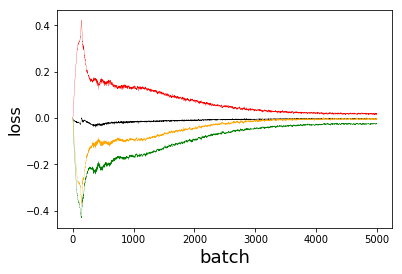

In [10]:
fig = plt.figure()
plt.plot([x[0] for x in wgan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in wgan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in wgan.d_losses], color='red', linewidth=0.25)
plt.plot(wgan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

# plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()

In [ ]:
fig = plt.figure()
plt.plot([x[3] for x in wgan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in wgan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in wgan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in wgan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()

In [11]:
wgan.save(RUN_FOLDER)

In [13]:
import numpy as np

In [29]:
def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

In [28]:
r, c = 5, 5

idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
true_imgs = ((x_train[idx] + 1) *0.5) * 255
true_imgs = true_imgs.astype('int').reshape((-1,28,28))

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(true_imgs[cnt])
        axs[i,j].axis('off')
        cnt+=1
fig.savefig(os.path.join(RUN_FOLDER, "images/real.png"))
plt.close()